In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\vinay\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\vinay\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
# Load the dataset
df = pd.read_csv("D://Semester-3//INFO 5709//5709 Project//archive//cybersecurity_attacks.csv")

In [5]:
# Display the shape of the dataset (number of rows and columns)
print("Shape of the dataset:", df.shape)

Shape of the dataset: (40000, 25)


In [6]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [7]:
# Display descriptive statistics of numeric columns
print(df.describe())

        Source Port  Destination Port  Packet Length  Anomaly Scores
count  40000.000000      40000.000000   40000.000000    40000.000000
mean   32970.356450      33150.868650     781.452725       50.113473
std    18560.425604      18574.668842     416.044192       28.853598
min     1027.000000       1024.000000      64.000000        0.000000
25%    16850.750000      17094.750000     420.000000       25.150000
50%    32856.000000      33004.500000     782.000000       50.345000
75%    48928.250000      49287.000000    1143.000000       75.030000
max    65530.000000      65535.000000    1500.000000      100.000000


In [8]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64


In [9]:
# Dropping the cybersecurity perspective columns
columns_to_drop = ['Source IP Address', 'Destination IP Address', 'Source Port', 'Destination Port', 'Payload Data', 'User Information', 'Proxy Information', 'Firewall Logs']
df_cleaned = df.drop(columns=columns_to_drop)

# Filling missing values in Alerts/Warnings, Malware Indicators, and IDS/IPS Alerts
df_cleaned['Alerts/Warnings'].fillna(value='Alert Not Triggered', inplace=True)
df_cleaned['Malware Indicators'].fillna(value='IoC not Detected', inplace=True)
df_cleaned['IDS/IPS Alerts'].fillna(value="Didn't Alert Data", inplace=True)

# Trimming only state from Geo-location Data to be able to represent on a map
df_cleaned['State'] = df_cleaned['Geo-location Data'].apply(lambda x: x.split(',')[-1].strip() if isinstance(x, str) else '')

# Confirm the changes
print("Shape of the cleaned dataset:", df_cleaned.shape)
df_cleaned

Shape of the cleaned dataset: (40000, 18)


C:\Users\vinay\AppData\Local\Temp\ipykernel_18012\1786140462.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Alerts/Warnings'].fillna(value='Alert Not Triggered', inplace=True)
C:\Users\vinay\AppData\Local\Temp\ipykernel_18012\1786140462.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

,Timestamp,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Device Information,Network Segment,Geo-location Data,IDS/IPS Alerts,Log Source,State
0,2023-05-30 06:33:58,ICMP,503,Data,HTTP,IoC Detected,28.67,Alert Not Triggered,Malware,Known Pattern B,Logged,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",Didn't Alert Data,Server,Sikkim
1,2020-08-26 07:08:30,ICMP,1174,Data,HTTP,IoC Detected,51.50,Alert Not Triggered,Malware,Known Pattern A,Blocked,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",Didn't Alert Data,Firewall,Nagaland
2,2022-11-13 08:23:25,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",Alert Data,Firewall,Rajasthan
3,2023-07-02 10:38:46,UDP,385,Data,HTTP,IoC not Detected,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",Alert Data,Firewall,Rajasthan
4,2023-07-16 13:11:07,TCP,1462,Data,DNS,IoC not Detected,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",Alert Data,Firewall,Tripura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,UDP,1428,Control,HTTP,IoC Detected,39.28,Alert Not Triggered,DDoS,Known Pattern A,Logged,Medium,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,Segment A,"Nashik, Manipur",Alert Data,Firewall,Manipur
39996,2023-03-27 00:38:27,UDP,1184,Control,HTTP,IoC Detected,27.25,Alert Not Triggered,DDoS,Known Pattern A,Logged,High,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,Segment C,"Vadodara, Mizoram",Didn't Alert Data,Firewall,Mizoram
39997,2022-03-31 01:45:49,UDP,1043,Data,DNS,IoC Detected,31.01,Alert Not Triggered,DDoS,Known Pattern B,Blocked,Low,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,Segment C,"Mahbubnagar, Himachal Pradesh",Alert Data,Server,Himachal Pradesh
39998,2023-09-22 18:32:38,UDP,483,Data,FTP,IoC Detected,97.85,Alert Triggered,Malware,Known Pattern B,Ignored,Low,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,Segment B,"Rourkela, Arunachal Pradesh",Didn't Alert Data,Server,Arunachal Pradesh


In [10]:
df_cleaned.isnull().sum()

Timestamp             0
Protocol              0
Packet Length         0
Packet Type           0
Traffic Type          0
Malware Indicators    0
Anomaly Scores        0
Alerts/Warnings       0
Attack Type           0
Attack Signature      0
Action Taken          0
Severity Level        0
Device Information    0
Network Segment       0
Geo-location Data     0
IDS/IPS Alerts        0
Log Source            0
State                 0
dtype: int64

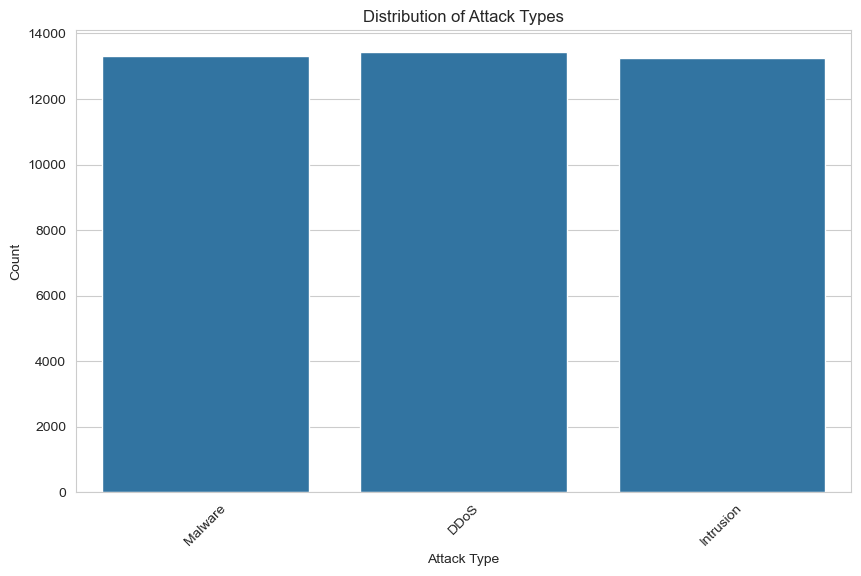

In [11]:
# Set style for seaborn plots
sns.set_style('whitegrid')

# Graph 1: Distribution of Attack Types
plt.figure(figsize=(10, 6))
sns.countplot(x='Attack Type', data=df_cleaned)
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

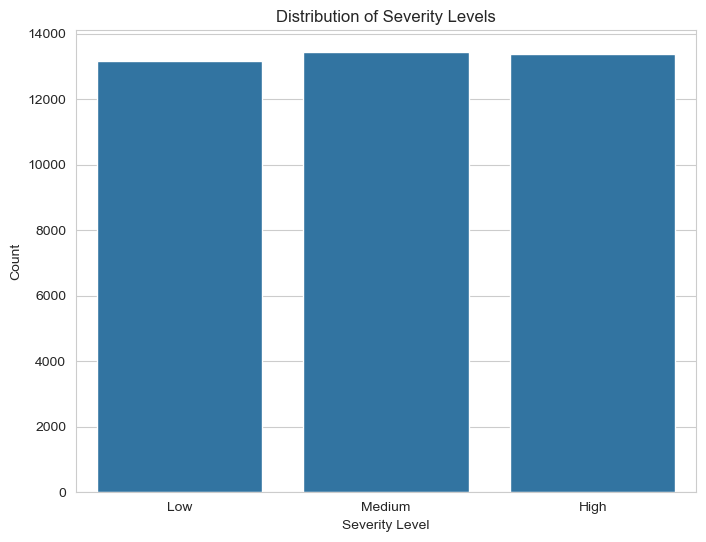

In [12]:
# Graph 2: Severity Level Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Severity Level', data=df_cleaned)
plt.title('Distribution of Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.show()

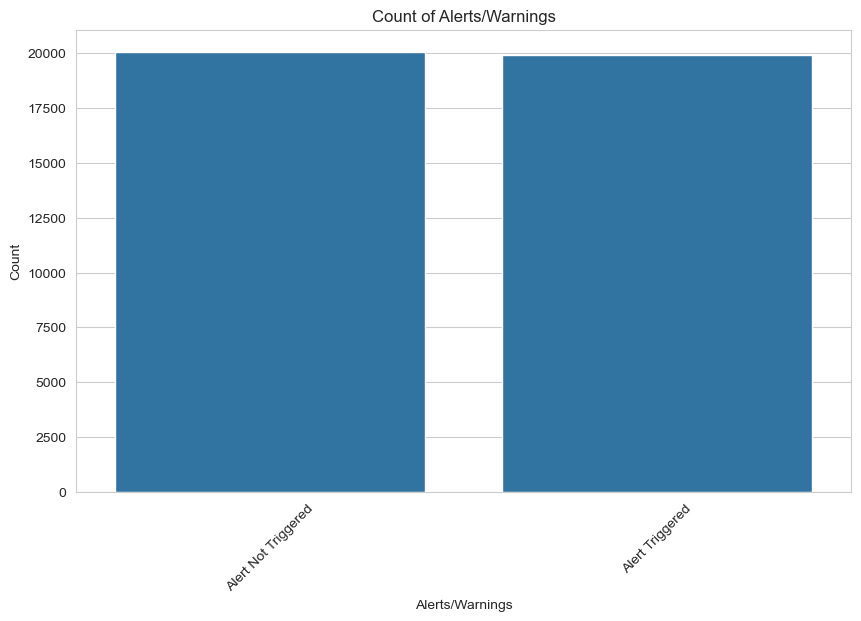

In [13]:
# Graph 4: Count of Alerts/Warnings
plt.figure(figsize=(10, 6))
sns.countplot(x='Alerts/Warnings', data=df_cleaned)
plt.title('Count of Alerts/Warnings')
plt.xlabel('Alerts/Warnings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

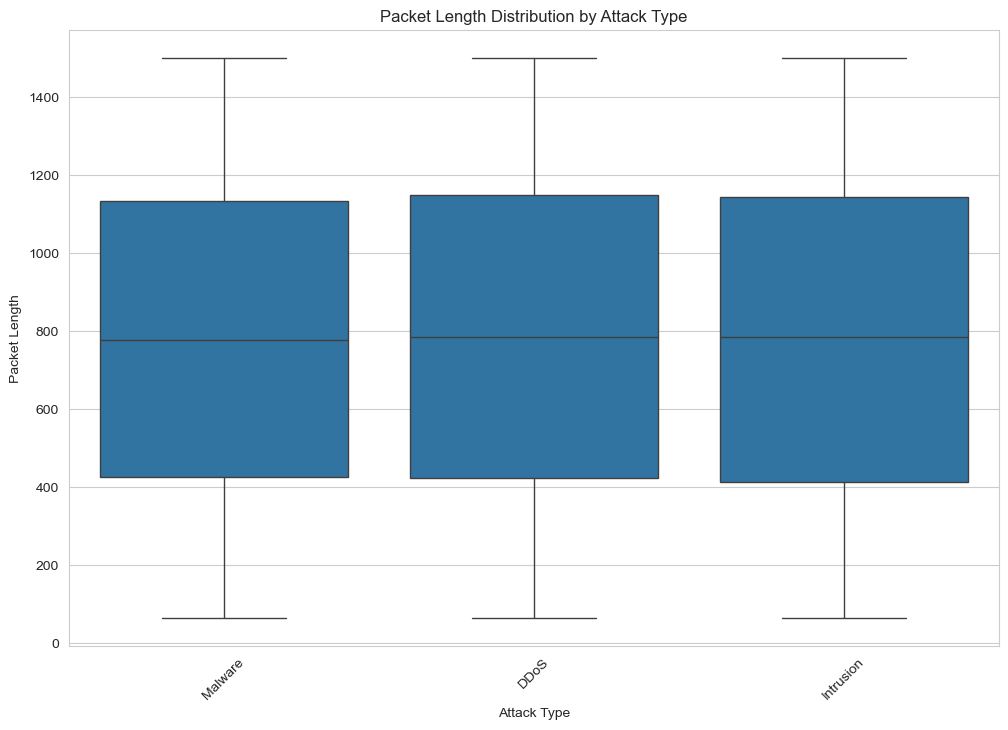

In [14]:
# Graph 4: Packet Length Distribution by Attack Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='Attack Type', y='Packet Length', data=df_cleaned)
plt.title('Packet Length Distribution by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Packet Length')
plt.xticks(rotation=45)
plt.show()

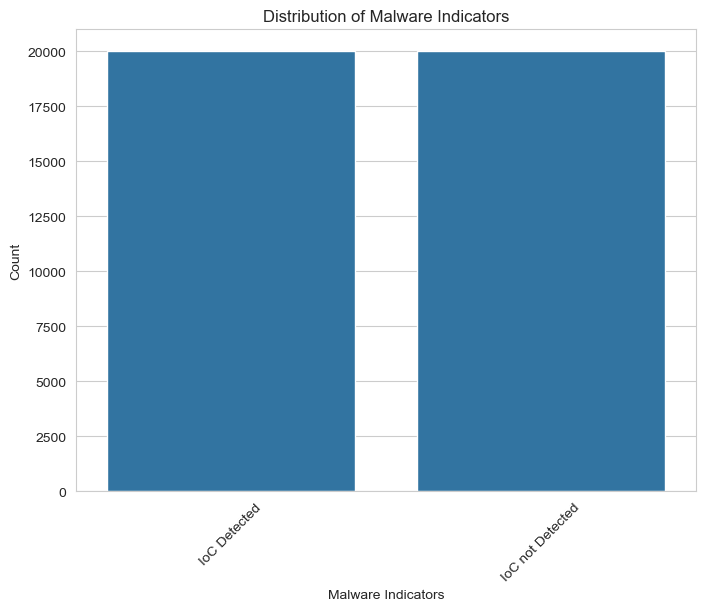

In [15]:
# Graph 5: Malware Indicators Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Malware Indicators', data=df_cleaned)
plt.title('Distribution of Malware Indicators')
plt.xlabel('Malware Indicators')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

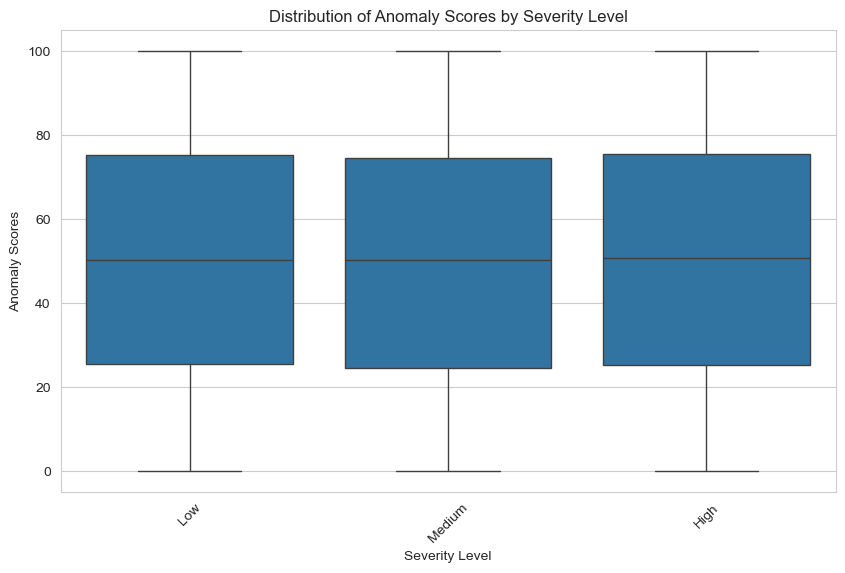

In [16]:
# Graph 6: Distribution of Anomaly Scores by Severity Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity Level', y='Anomaly Scores', data=df_cleaned)
plt.title('Distribution of Anomaly Scores by Severity Level')
plt.xlabel('Severity Level')
plt.ylabel('Anomaly Scores')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Saved the cleaned dataset to a CSV file
df_cleaned.to_csv('cybersecurity_attacks_dataset_cleaned.csv', index=False)

In [2]:
import pandas as pd

df = pd.read_csv('cybersecurity_attacks_dataset_cleaned.csv')
# Assuming your dataset is stored in a DataFrame called 'df'
# Replace 'df' with the actual name of your DataFrame
# Count the number of unique packet lengths
unique_packet_lengths = df['Packet Length'].nunique()

# Display the number of unique packet lengths
print("Number of unique packet lengths:", unique_packet_lengths)

# Count the occurrences of each unique packet length
packet_length_counts = df['Packet Length'].value_counts()

# Display the counts
print(packet_length_counts)


Number of unique packet lengths: 1437
Packet Length
1037    47
1278    45
104     45
855     44
1361    44
        ..
914     15
470     14
568     14
216     12
940      9
Name: count, Length: 1437, dtype: int64
